# Sentiment Analysis

Sentiment analysis is the process of using natural language processing (NLP) techniques to automatically identify and extract opinions, attitudes, and emotions from text data. This can be useful for a wide range of applications, such as analyzing customer feedback, tracking the sentiment of social media posts, or detecting the sentiment of news articles.

Sentiment analysis typically involves applying machine learning algorithms to a large dataset of labeled text, where the labels indicate the sentiment of each text. The algorithm learns to identify the words and phrases that are most strongly associated with each sentiment, and it uses this information to make predictions about the sentiment of the new, unseen text. Common sentiments that are analyzed include positive, negative, and neutral, but more fine-grained sentiment analysis can also be performed, such as identifying the specific emotions that are expressed in the text (such as anger, fear, or joy).

In general, sentiment analysis can be used to gauge the overall sentiment of a group of people towards a particular topic or product, or to identify patterns and trends in the sentiment of a particular group over time. It is a useful tool for businesses and organizations that want to understand how their customers or stakeholders feel about a particular issue or product.

Various libraries in python enable the users to perform sentiment analysis. The two that will be used in this project is from VADER (Valence Aware Dictionary and sEntiment Reasoner) and huggingface transformers. It provides functions which can utilized deep learning based pre-trained models for sentiment analysis.

In [1]:
# Load necessary packages
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline

import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
pio.renderers.default = "svg"

In [2]:
# Load the data
df = pd.read_hdf('./../../code/data/starbucks/data.h5', key='preprocessed_starbucks')

In [3]:
# Store only the required tweets
data = df['preprocessed_tweet'].values.tolist()

## Huggingface transformers

Hugging Face is an open-source library that provides tools for natural language processing (NLP) tasks such as text classification, language translation, and sentiment analysis. It includes a large collection of pre-trained models that can be fine-tuned for specific tasks and datasets, as well as tools for building and training custom NLP models.

The pre-trained embedding model that will be used for performing the sentiment analysis is "finiteautomata/bertweet-base-sentiment-analysis". It is a roBERTa model trained on ~58M tweets and fine-tuned for sentiment analysis. Fine-tuning is the process of taking a pre-trained large language model (e.g. roBERTa in this case) and then tweaking it with additional training data to make it perform a second similar task (e.g. sentiment analysis).

In [4]:
# Load the models
sentiment_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Downloading:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [5]:
# Get the sentiments
sentiment_results = sentiment_model(data)

In [6]:
# Frame the result
tweets = df['tweet'].values
texts = df['preprocessed_tweet'].values

model_result = []
for i in range(df.shape[0]):
    series = [tweets[i], texts[i], sentiment_results[i]['label'], sentiment_results[i]['score']]

    model_result.append(series)

model_result = pd.DataFrame(model_result, columns=['Tweet', 'Preprocessed tweet', 'Sentiment', 'Sentiment score'])


In [7]:
# Print the sample
model_result.head()

,Tweet,Preprocessed tweet,Sentiment,Sentiment score
0,So now you up 3am for work. These boomers 🤬 th...,3 a.m. work boomer wake early bullshxt stop bu...,NEG,0.983999
1,@ScottPalmer61 Yes. It’s a special Starbucks a...,yes special attachment,POS,0.517730
2,I like the caramel frappe from Starbucks https...,like caramel frappe,NEU,0.815581
3,Why is No Time To Die playing on repeat at #St...,time die playing repeat notice,NEG,0.753684
4,https://t.co/tgR9Z5p8Ts | Criminals steal 200 ...,criminal steal 200 000 customer datum singapor...,NEG,0.935092


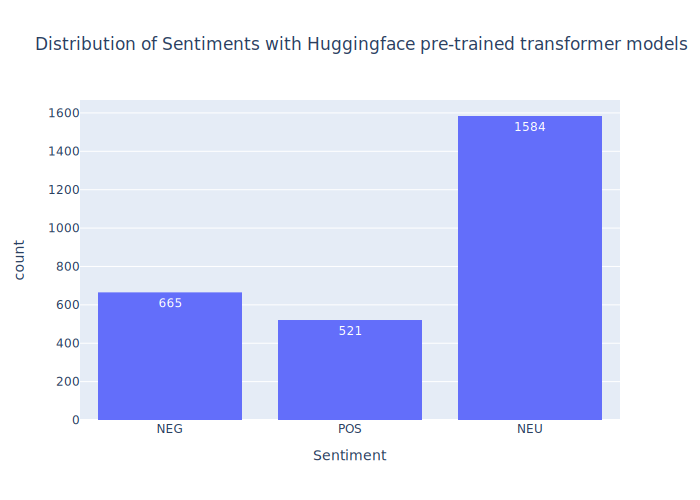

In [8]:
# Plot the sentiment distribution
fig = px.histogram(model_result, x='Sentiment', title="Distribution of Sentiments with Huggingface pre-trained transformer models", text_auto=True)
fig.show()

The predicted that most of the tweets are neutral but there are more negative sentiments about the Starbucks than there are postive sentiments.

## VADER

The Valence Aware Dictionary and sEntiment Reasoner (VADER) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is designed to be sensitive to the nuances of sentiment expressed in text, including the intensity, the emotion, and the subjectivity of the sentiment.

VADER uses a combination of machine learning techniques and a set of manually created rules to analyze the sentiment of text. It takes into account the context and the structure of the text, as well as the words and phrases used, to determine the overall sentiment. It also includes a set of rules for handling negation, booster words, and emphasis, which help it to better understand the sentiment being expressed.

VADER has been widely used for sentiment analysis in various contexts, including social media analysis, market research, and customer service. It is known for its robust performance and ability to handle sarcasm and other forms of irony, making it a useful tool for understanding the sentiment expressed in social media and other forms of online communication.

In [9]:
# Initialize the model
sentiment_model = SentimentIntensityAnalyzer()

In [10]:
df.columns

Index(['Unnamed: 0', 'tweet', 'conversation_id', 'date', 'hashtags', 'id',
       'inReplyToTweetId', 'reply_to', 'language', 'likes_count', 'media',
       'mentions', 'quote_count', 'quoted_tweet', 'replies_count',
       'retweets_count', 'link', 'followers_count', 'following_count',
       'favourites_count', 'user_status_count', 'location', 'name',
       'description', 'verified', 'url', 'user_id', 'username',
       'preprocessed_tweet'],
      dtype='object')

In [11]:
# Get the sentiment and frame the result
model_result = []
for index, row in df.iterrows():
    sentiment_result = sentiment_model.polarity_scores(row['preprocessed_tweet'])
    sentiment_scores = {
        'NEG': sentiment_result['neg'],
        'POS': sentiment_result['pos'],
        'NEU': sentiment_result['neu']
    }
    sentiment = max(sentiment_scores, key=sentiment_scores.get)
    model_result.append([row['tweet'], row['preprocessed_tweet'], sentiment, sentiment_scores[sentiment]])

model_result = pd.DataFrame(model_result, columns=['Tweet', 'Preprocessed tweet', 'Sentiment', 'Sentiment score'])

In [12]:
model_result.head()

,Tweet,Preprocessed tweet,Sentiment,Sentiment score
0,So now you up 3am for work. These boomers 🤬 th...,3 a.m. work boomer wake early bullshxt stop bu...,NEU,0.692
1,@ScottPalmer61 Yes. It’s a special Starbucks a...,yes special attachment,POS,1.000
2,I like the caramel frappe from Starbucks https...,like caramel frappe,POS,0.556
3,Why is No Time To Die playing on repeat at #St...,time die playing repeat notice,NEG,0.448
4,https://t.co/tgR9Z5p8Ts | Criminals steal 200 ...,criminal steal 200 000 customer datum singapor...,NEU,0.515


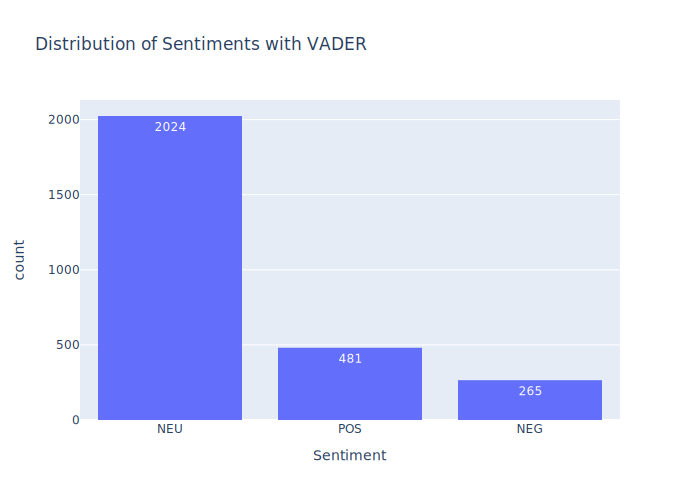

In [13]:
# Plot the sentiment distribution
fig = px.histogram(model_result, x='Sentiment', title="Distribution of Sentiments with VADER", text_auto=True)
fig.show()

Even the VADER model does not agrees with the huggingface transformers. Most of the tweets have neutral sentiments but there are more positive sentiments than there are negative sentiments about the brand.